In [1]:
pip install polyfuzz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 35.1 MB/s 
     |████████████████████████████████| 103 kB 62.4 MB/s 


In [2]:
from polyfuzz import PolyFuzz

from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple", "apples", "mouse"]

model = PolyFuzz("TF-IDF").match(from_list, to_list)


In [5]:
model.get_matches()

,From,To,Similarity
0,apple,apples,0.787
1,apples,apple,0.787
2,appl,apple,0.767
3,recal,None,0.000
4,house,None,0.000
5,similarity,None,0.000


In [ ]:
from polyfuzz import PolyFuzz
from polyfuzz.models import EditDistance
from jellyfish import jaro_winkler_similarity

from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple", "apples", "mouse"]

jellyfish_matcher = EditDistance(n_jobs=1, scorer=jaro_winkler_similarity)
model = PolyFuzz("Edit Distance").match(from_list, to_list)

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from polyfuzz import PolyFuzz

train_words = ["apple", "apples", "appl", "recal", "house", "similarity"]
unseen_words = ["apple", "apples", "mouse"]

# Fit
model = PolyFuzz("TF-IDF")
model.fit(train_words)

# Transform
results = model.transform(unseen_words)


In [6]:
results

{'TF-IDF':      From      To  Similarity
 0   apple   apple       1.000
 1  apples  apples       1.000
 2   mouse   house       0.816}

In [ ]:
train_words = ["apple", "apples", "appl", "recal", "house", "similarity"]
unseen_words = ["apple", "apples", "mouse","recl", "simis"]

# Fit
model = PolyFuzz("TF-IDF")
model.match(unseen_words, train_words)
model.get_matches()

,From,To,Similarity
0,apple,apple,1.000
1,apples,apples,1.000
2,mouse,house,0.594
3,recl,recal,0.336
4,simis,similarity,0.341


In [7]:
model.group(link_min_similarity=0.75)
model.get_matches()


,From,To,Similarity,Group
0,apple,apples,0.787,apple
1,apples,apple,0.787,apple
2,appl,apple,0.767,apple
3,recal,None,0.000,None
4,house,None,0.000,None
5,similarity,None,0.000,None


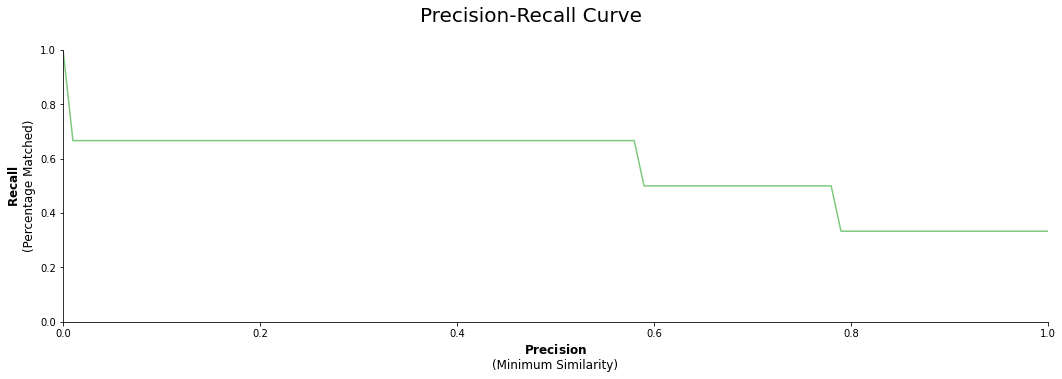

In [ ]:
model.visualize_precision_recall()